# **ANÁLISE DE CLUSTER**
*   ### **Case**: *Livraria*



### Instalação de bibliotecas

In [1]:
# As bibliotecas utilizadas neste notebook já vêm pré-instaladas no Google Colab

### Carregamento de bibliotecas

In [2]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf                               # Ajuste de modelos de regressão
from scipy.spatial.distance import cdist                            # Cálculo de distância euclidiana
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster   # Agrupamento hierárquico
from sklearn.cluster import KMeans                                  # Agrupamento por k-médias
from sklearn.decomposition import PCA                               # Redução de dimensões

### Leitura da base de dados

In [3]:
dados_habitos = pd.read_table("../Dados/Habitos_Alimentares.txt", sep = "\t")

### Visualização da base de dados

In [4]:
display(dados_habitos)

,PAIS,CARNE_VERMELHA,CARNE_BRANCA,OVOS,LEITE,PEIXES,CEREAIS,CARBOIDRATOS,GRAOS,FRUTAS_LEGUMES
0,Albania,86.0,14.2,34.9,173.5,1.9,81.7,15.8,97.8,31.4
1,Alemanha,97.1,127.1,286.6,366.5,32.3,35.9,137.2,26.7,70.2
2,Austria,75.8,142.4,300.5,388.0,20.0,54.1,95.0,23.1,79.5
3,Belgica,115.0,94.6,286.6,341.2,42.8,51.4,150.4,37.3,73.9
4,Bulgaria,66.4,61.0,111.8,161.8,11.4,109.5,29.0,65.8,77.6
5,Croacia,37.5,50.8,83.9,185.2,5.7,108.0,79.2,101.4,59.1
6,Dinamarca,90.3,109.8,258.6,487.4,94.2,42.3,126.7,12.4,44.4
7,Eslovaquia,82.6,115.9,195.7,243.7,19.0,66.2,132.0,19.6,73.9
8,Espanha,60.5,34.6,216.7,167.7,66.6,56.4,150.4,104.9,133.1
9,Finlandia,80.9,49.8,188.7,657.0,55.2,50.8,134.6,17.8,25.9


### Padronização e cálculo da matriz de distâncias

In [5]:
# Padronização das variaveis quantitativas
medias  = np.mean(dados_habitos.drop(columns = ['PAIS']), axis = 0)
desvios = np.std(dados_habitos.drop(columns = ['PAIS']), axis = 0)
dados_habitos_padronizada = (dados_habitos.drop(columns = ['PAIS']) - medias) / desvios

In [6]:
# Cálculo da matriz de distâncias euclidianas
dist_matrix = cdist(dados_habitos_padronizada, dados_habitos_padronizada, metric = 'euclidean')

### Agrupamento pelo algoritmo hierárquico

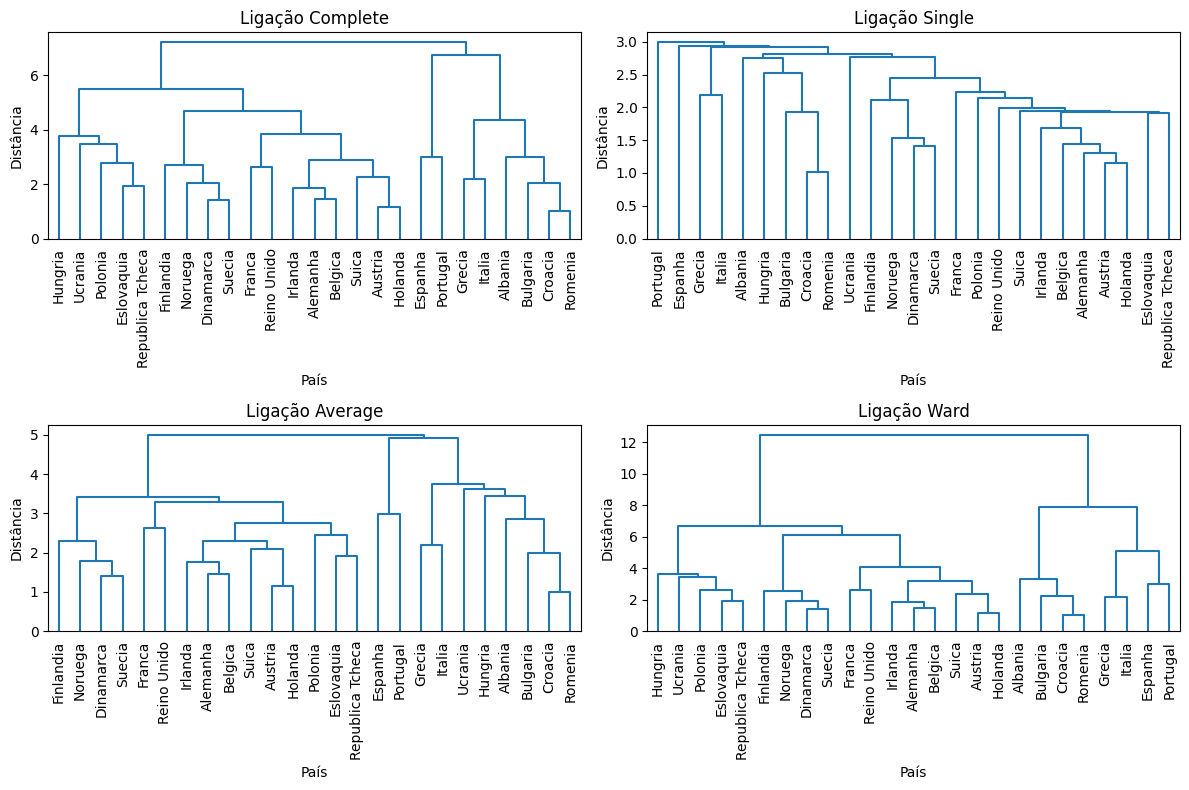

In [7]:
# Execução do algoritmo e dendrogramas, para diferentes critérios de ligação
metodos = ['complete', 'single', 'average', 'ward']
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

for ax, metodo in zip(axes.flatten(), metodos):
    Z = linkage(dados_habitos_padronizada, method = metodo)
    dendrogram(Z,
               ax = ax,
               labels = dados_habitos['PAIS'].values,
               color_threshold = 0)
    ax.set_title(f'Ligação {metodo.capitalize()}')
    ax.set_xlabel('País')
    ax.set_ylabel('Distância')
    plt.setp(ax.get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()

In [8]:
# Substitua o ponto (.) pelo nome do objeto correspondente ao critério de ligação que você considera mais adequado, entre aspas ('')
metodo_escolhido = .   # nome do metodo escolhido (por exemplo: 'single')

SyntaxError: invalid syntax (3762158707.py, line 2)

In [ ]:
# Substitua o ponto (.) pela quantidade k de grupos que deseja, para o método escolhido
k_escolhido = .   # quantidade de grupos (por exemplo: 2)

In [ ]:
# Registrando os clusters da segmentação escolhida como uma nova coluna na base de dados
modelo = linkage(dados_habitos_padronizada, method = metodo_escolhido)
dados_habitos['cluster_hierarquico'] = fcluster(modelo, k_escolhido, criterion = 'maxclust')

### Análise descritiva dos clusters do algoritmo hierárquico

In [ ]:
# Gráficos de boxplot
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (12, 6))

variaveis = ['CARNE_VERMELHA',
             'CARNE_BRANCA',
             'OVOS',
             'LEITE',
             'PEIXES',
             'CEREAIS',
             'CARBOIDRATOS',
             'GRAOS',
             'FRUTAS_LEGUMES']

for ax, variavel in zip(axes.flat, variaveis):

  sns.boxplot(y = variavel,
              x = 'cluster_hierarquico',
              data = dados_habitos,
              width = 0.4,
              boxprops = {'facecolor':'darkturquoise', 'edgecolor':'white'},
              whiskerprops = {'color':'turquoise'},
              capprops     = {'color': 'darkturquoise'},
              medianprops  = {'color':'white'},
              flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'},
              ax = ax)
  ax.set_title(f'{variavel}')
  ax.set_xlabel('Cluster')

axes.flat[-1].set_visible(False)  # Deixar vazio o 10º slot do gráfico, pois temos 9 variáveis
plt.tight_layout()
plt.show()

### Agrupamento pelo algoritmo k-médias

In [9]:
# Execução do algoritmo para diferentes valores de k
k_values = [2, 3, 4, 5]
kmeans_models = [KMeans(n_clusters = k, n_init = 25, max_iter = 100, random_state = 12345).fit(dados_habitos_padronizada) for k in k_values]

In [10]:
# Redução dos clusters para duas dimensões, para fins de visualização aproximada
pca           = PCA(n_components = 2)
dados_pca     = pca.fit_transform(dados_habitos_padronizada)
var_explicada = pca.explained_variance_ratio_ * 100

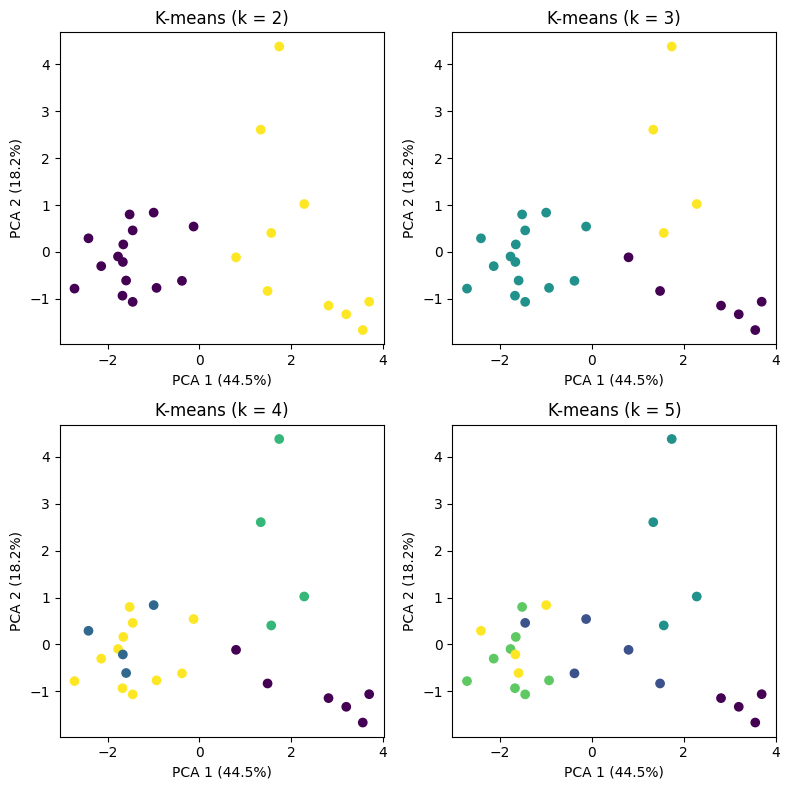

In [11]:
# Visualização dos clusters de forma aproximada, reduzindo para 2 dimensões
fig, axes = plt.subplots(2, 2, figsize = (8, 8))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(dados_pca[:, 0], dados_pca[:, 1], c = kmeans_models[i].labels_, cmap = 'viridis')
    ax.set_title(f'K-means (k = {k_values[i]})')
    ax.set_xlabel(f'PCA 1 ({var_explicada[0]:.1f}%)')
    ax.set_ylabel(f'PCA 2 ({var_explicada[1]:.1f}%)')

plt.tight_layout()
plt.show()

In [ ]:
# Substitua o ponto (.) pela quantidade k de grupos que deseja, para o método escolhido
k_escolhido = .   # quantidade de grupos (por exemplo: 2)

In [12]:
# Registrando os clusters da segmentação escolhida como uma nova coluna na base de dados
kmeans = [KMeans(n_clusters = 3, n_init = 25, max_iter = 100, random_state = 12345).fit(dados_habitos_padronizada)]
dados_habitos['cluster_kmedias'] = kmeans[0].labels_ + 1

### Análise descritiva dos clusters do algoritmo k-médias

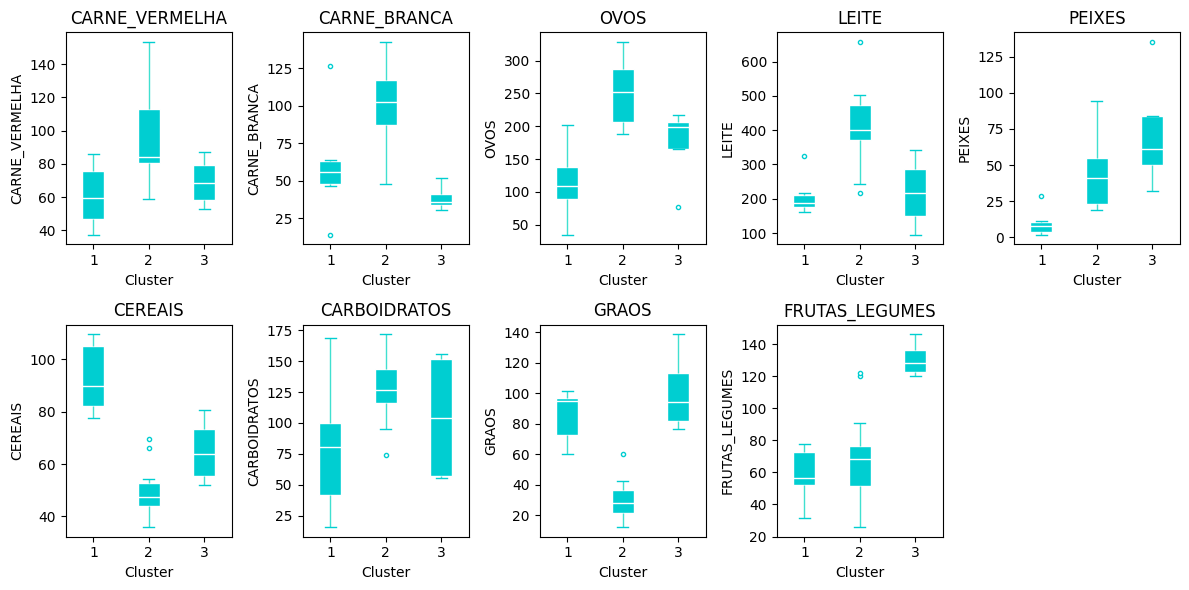

In [13]:
# Gráficos de boxplot
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (12, 6))

variaveis = ['CARNE_VERMELHA',
             'CARNE_BRANCA',
             'OVOS',
             'LEITE',
             'PEIXES',
             'CEREAIS',
             'CARBOIDRATOS',
             'GRAOS',
             'FRUTAS_LEGUMES']

for ax, variavel in zip(axes.flat, variaveis):

  sns.boxplot(y = variavel,
              x = 'cluster_kmedias',
              data = dados_habitos,
              width = 0.4,
              boxprops = {'facecolor':'darkturquoise', 'edgecolor':'white'},
              whiskerprops = {'color':'turquoise'},
              capprops     = {'color': 'darkturquoise'},
              medianprops  = {'color':'white'},
              flierprops   = {'markerfacecolor': 'white', 'markeredgecolor': 'darkturquoise', 'marker': 'o', 'markersize': 3, 'color': 'turquoise', 'linestyle': 'none'},
              ax = ax)
  ax.set_title(f'{variavel}')
  ax.set_xlabel('Cluster')

axes.flat[-1].set_visible(False)  # Deixar vazio o 10º slot do gráfico, pois temos 9 variáveis
plt.tight_layout()
plt.show()